In [59]:
import matplotlib.pyplot as plt
from view import *

In [23]:
attributions1 = ["t1", "t2"]
durations1 = ["1:10", "0:15"]


attributions2 = ["t1", "t3"]
durations2 = ["0:35", "0:20"]

attributions3=[]
durations3=[]


In [24]:
attributions_lists = []
attributions_lists.append(attributions1)
attributions_lists.append(attributions2)
attributions_lists.append(attributions3)

durations_lists = []
durations_lists.append(durations1)
durations_lists.append(durations2)
durations_lists.append(durations3)
attributions_lists, durations_lists

([['t1', 't2'], ['t1', 't3'], []], [['1:10', '0:15'], ['0:35', '0:20'], []])

In [58]:
def consolidate_attributions_and_durations_lists(attributions_lists, durations_lists):
    all_attributions = []
    all_durations = []

    for att_l_idx, att_list in enumerate(attributions_lists):  # att_l_idx indexes the day corresponding to the attribution list
        for it_idx, it in enumerate(att_list):  # for each item in that attribution list
            try:  # if the current item it is already in the all_attribution list
                idx = all_attributions.index(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations[idx] += str_to_timedelta(it_dur)
#                 print("try", all_attributions, all_durations)
            except ValueError:  #  else
                all_attributions.append(it)
                it_dur = durations_lists[att_l_idx][it_idx]
                all_durations.append(str_to_timedelta(it_dur))
#                 print("except", all_attributions, all_durations)

    return all_attributions, all_durations

consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)

(['ucsd_course_cogs203',
  'ucsd',
  'ucsd_admin',
  'personal',
  'sideways-investigation',
  'ucsd_proj',
  'ucsd_proj_meeting',
  'ucsd_course_cogs201',
  'ucsd_class'],
 [datetime.timedelta(seconds=23400),
  datetime.timedelta(seconds=5400),
  datetime.timedelta(seconds=7200),
  datetime.timedelta(seconds=600),
  datetime.timedelta(seconds=2700),
  datetime.timedelta(seconds=21600),
  datetime.timedelta(seconds=3300),
  datetime.timedelta(seconds=900),
  datetime.timedelta(seconds=10800)])

In [7]:
3600+45*60

6300

<BarContainer object of 15 artists>

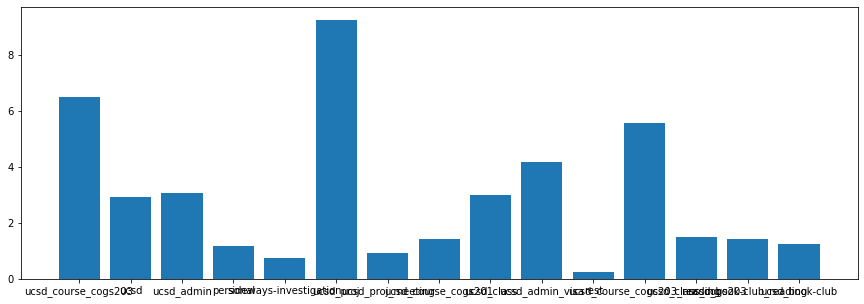

In [64]:
def get_attributions_and_durations(strdate):
    try:
        with open(join(JOURNALS_FOLDER, strdate+TXT_FORMAT), 'r', encoding=UTF8_ENCODING) as f:
            daily_journal = f.read().strip()
    except FileNotFoundError as e:
        return [],[]

    duration_attribution_list = re.findall('\^T([a-zA-Z0-9_-]+)=(\d?\d:\d\d)', daily_journal)  #TODO: include format 2.5 (for 2.5 hours = 2:30)

    attributions = []
    durations = []                                                                                                                                                                                      
    for item in duration_attribution_list:
        attributions.append(item[0])
        durations.append(item[1])
    
    return attributions, durations

attributions_lists = []
durations_lists = []
for day in ["2020-11-01", "2020-11-02", "2020-11-03", "2020-11-04", "2020-11-05"]:
    attributions, durations = get_attributions_and_durations(day)
    attributions_lists.append(attributions)
    durations_lists.append(durations)
atts, durs = consolidate_attributions_and_durations_lists(attributions_lists, durations_lists)

plt.figure(figsize=(15,5))
plt.bar(range(len(durs)), [dur.seconds/3600 for dur in durs], tick_label=atts)